## Recommender System

We will use famous MovieLens dataset, which is one of the most common datasets used when implementing and testing recommender engines. It contains 100k movie ratings from 943 users and a selection of 1682 movies.

We will use Item Similarity based recommendation system for this project.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
pd.read_csv('u.data')

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [7]:
df = pd.read_csv('u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [8]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [10]:
titles = pd.read_csv('Movie_Id_Titles')
titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [35]:
df = pd.merge(df,titles, on = 'item_id' )

In [36]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## EDA

Create a DataFrame with number of ratings and average ratings for each movies

In [15]:
avg_rate = df.groupby('title',as_index = False)['rating'].mean()
avg_rate

,title,rating
0,'Til There Was You (1997),2.333333
1,1-900 (1994),2.600000
2,101 Dalmatians (1996),2.908257
3,12 Angry Men (1957),4.344000
4,187 (1997),3.024390
...,...,...
1659,Young Guns II (1990),2.772727
1660,"Young Poisoner's Handbook, The (1995)",3.341463
1661,Zeus and Roxanne (1997),2.166667
1662,unknown,3.444444


In [24]:
rate_count = df.groupby('title',as_index = False)['rating'].count()
rate_count

,title,rating
0,'Til There Was You (1997),9
1,1-900 (1994),5
2,101 Dalmatians (1996),109
3,12 Angry Men (1957),125
4,187 (1997),41
...,...,...
1659,Young Guns II (1990),44
1660,"Young Poisoner's Handbook, The (1995)",41
1661,Zeus and Roxanne (1997),6
1662,unknown,9


In [57]:
movies = pd.merge(avg_rate,rate_count,on='title')
movies.rename(columns = {'rating_x': 'avg_rating',
                        'rating_y': 'num. of rating'},
             inplace = True)

In [58]:
movies

,title,avg_rating,num. of rating
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41
...,...,...,...
1659,Young Guns II (1990),2.772727,44
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41
1661,Zeus and Roxanne (1997),2.166667,6
1662,unknown,3.444444,9


<Axes: >

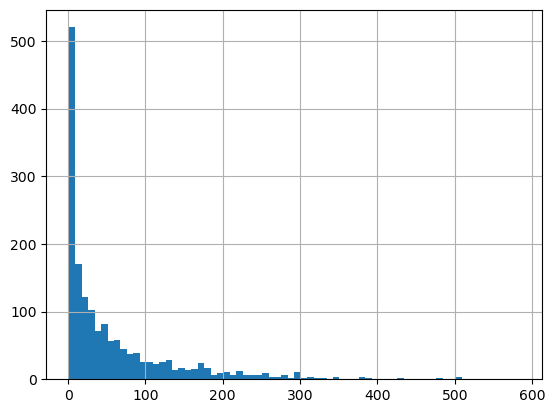

In [29]:
movies['num. of rating'].hist(bins=70)

So not alot of movies received many ratings, most of the movies have only less than 100 ratings.

<Axes: >

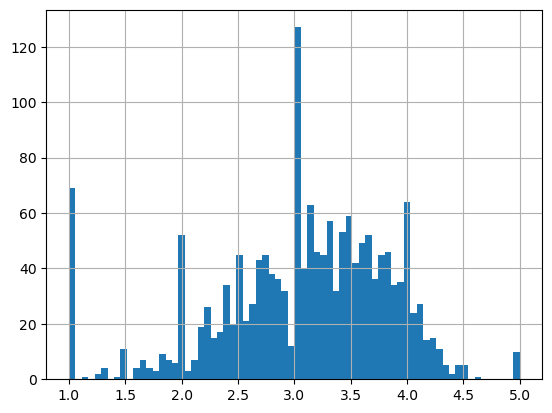

In [30]:
movies['avg_rating'].hist(bins = 70)

It seems the average ratings is around 3 stars. The number of 1 star ratings is surprisingly high while the number of 5 star ratings is only a few. These 5 stars reviews are probably belongs to those popular movies or the ones that has only 1 or 2 ratings. 

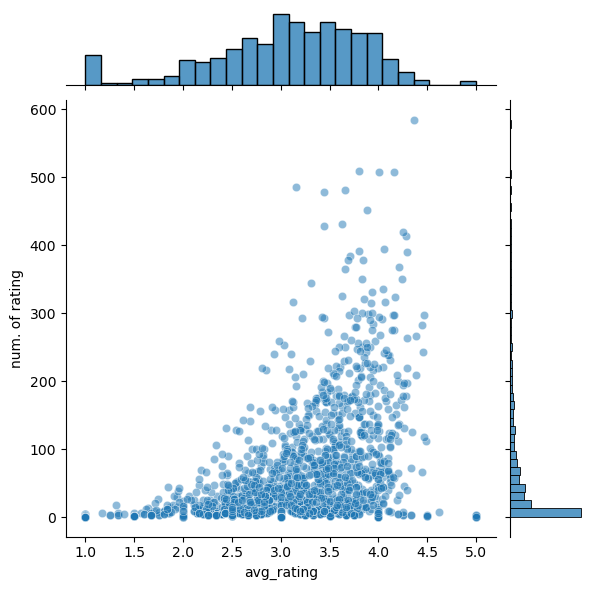

In [32]:
sns.jointplot(movies,x='avg_rating', y='num. of rating',alpha = 0.5)

It seems like if a movies has higher number of ratings, the more likely it will receive higher ratings.

## Recommender System

In [37]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [39]:
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
movies.sort_values('num. of rating', ascending = False)

,title,avg_rating,num. of rating
1398,Star Wars (1977),4.359589,584
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485
...,...,...,...
633,"Great Day in Harlem, A (1994)",5.000000,1
1111,"Other Voices, Other Rooms (1997)",3.000000,1
620,Good Morning (1971),1.000000,1
606,Girls Town (1996),3.000000,1


In [41]:
star_war_user_rating = moviemat['Star Wars (1977)']
liar_liar_user_rating = moviemat['Liar Liar (1997)']

In [43]:
star_war_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Compute the correlation between the whole moviemat dataframe, row by row (the axis parameter in the corrwith method is default by 0), with the series star_war_user_rating. 

In [45]:
similar_to_starwars = moviemat.corrwith(star_war_user_rating)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [46]:
similar_to_liarliar = moviemat.corrwith(liar_liar_user_rating)
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [50]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation']).dropna()
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


The Data Frame tells us how correlated these movies' user ratings were to the user ratings of the movie Star Wars.

In [51]:
corr_starwars.sort_values('correlation', ascending = False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Checking the movie that are most similar to Star Wars movie, in term of users ratings, we found that these movie does not actually similar to Star Wars. These perfect correlation most likely because these movies are rated by the same person who gave Star Wars a 5-star rating.

#### Filter our movies that has less than 100 ratings

In [59]:
movies = movies.set_index('title')
corr_starwars = corr_starwars.join(movies['num. of rating'])
corr_starwars

,correlation,num. of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


Check the correlation again for the Star Wars movie.

In [71]:
starwars_rec = corr_starwars[corr_starwars['num. of rating']>100].sort_values('correlation', ascending = False).head()
starwars_rec

,correlation,num. of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


The algorithm is working better and actually makes sense. 

Let's check the algorithm for the movie Liar Liar

In [67]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['correlation']).dropna()
corr_liarliar

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [68]:
corr_liarliar = corr_liarliar.join(movies['num. of rating'])
corr_liarliar

,correlation,num. of rating
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [72]:
liarliar_rec = corr_liarliar[corr_liarliar['num. of rating']>100].sort_values('correlation', ascending = False).head()
liarliar_rec

,correlation,num. of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [79]:
liarliar_rec.index

Index(['Liar Liar (1997)', 'Batman Forever (1995)', 'Mask, The (1994)',
       'Down Periscope (1996)', 'Con Air (1997)'],
      dtype='object', name='title')

The algorithm has finished recommending similar movies to 2 movies: Star wars and Liar Liar, in term of users ratings. 

Similar movies to Star Wars are The Empire Strikes Back (1980), Return of the Jedi (1983), Raiders of the Lost Ark (1981), Austin Powers: International Man of Mystery (1997).

Similar movies to Liar Liar are Batman Forever (1995), The Mask (1994), Down Periscope (1996), Con Air (1997).